In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

old_f= gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\old freguesias\old_freguesias.shp")
current_f = gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\current freguesias\freguesias.shp")
DB11= gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\census 2011\BGRI2011_1106_all.gpkg")
DB21 = gpd.read_file(r"C:\Users\Desmond\Documents\GitHub\Lisbon-freguesias\data\data censos 2021\BGRI2021_1106.gpkg")

import warnings
warnings.filterwarnings('ignore')

C:\Users\Desmond\anaconda3\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
DB11.head(5)

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,ANO,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_3OUMAIS,N_EDIFICIOS_CLASSICOS_OUTROS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_PRINCIPAL_RESID,N_EDIFICIOS_PRINCIP_NAO_RESID,N_EDIFICIOS_1OU2_PISOS,N_EDIFICIOS_3OU4_PISOS,.N_EDIFICIOS_5OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1919,N_EDIFICIOS_CONSTR_1919A1945,N_EDIFICIOS_CONSTR_1946A1960,N_EDIFICIOS_CONSTR_1961A1970,N_EDIFICIOS_CONSTR_1971A1980,N_EDIFICIOS_CONSTR_1981A1990,N_EDIFICIOS_CONSTR_1991A1995,N_EDIFICIOS_CONSTR_1996A2000,N_EDIFICIOS_CONSTR_2001A2005,N_EDIFICIOS_CONSTR_2006A2011,N_EDIFICIOS_ESTRUT_BETAO,N_EDIFICIOS_ESTRUT_COM_PLACA,N_EDIFICIOS_ESTRUT_SEM_PLACA,N_EDIFICIOS_ESTRUT_ADOBE_PEDRA,N_EDIFICIOS_ESTRUT_OUTRA,N_ALOJAMENTOS,N_ALOJAMENTOS_FAMILIARES,N_ALOJAMENTOS_FAM_CLASSICOS,N_ALOJAMENTOS_FAM_N_CLASSICOS,N_ALOJAMENTOS_COLECTIVOS,N_CLASSICOS_RES_HABITUAL,N_ALOJAMENTOS_RES_HABITUAL,N_ALOJAMENTOS_VAGOS,N_RES_HABITUAL_COM_AGUA,N_RES_HABITUAL_COM_RETRETE,N_RES_HABITUAL_COM_ESGOTOS,N_RES_HABITUAL_COM_BANHO,N_RES_HABITUAL_AREA_50,N_RES_HABITUAL_AREA_50_100,N_RES_HABITUAL_AREA_100_200,N_RES_HABITUAL_AREA_200,N_RES_HABITUAL_1_2_DIV,N_RES_HABITUAL_3_4_DIV,N_RES_HABITUAL_ESTAC_1,N_RES_HABITUAL_ESTAC_2,N_RES_HABITUAL_ESTAC_3,N_RES_HABITUAL_PROP_OCUP,N_RES_HABITUAL_ARREND,N_FAMILIAS_CLASSICAS,N_FAMILIAS_INSTITUCIONAIS,N_FAMILIAS_CLASSICAS_1OU2_PESS,N_FAMILIAS_CLASSICAS_3OU4_PESS,N_FAMILIAS_CLASSICAS_NPES65,N_FAMILIAS_CLASSICAS_NPES14,N_FAMILIAS_CLASSIC_SEM_DESEMP,N_FAMILIAS_CLASSIC_1DESEMPREG,N_FAMILIAS_CLASS_2MAIS_DESEMP,N_NUCLEOS_FAMILIARES,N_NUCLEOS_1FILH_NAO_CASADO,N_NUCLEOS_2FILH_NAO_CASADO,N_NUCLEOS_FILH_INF_6ANOS,N_NUCLEOS_FILH_INF_15ANOS,N_NUCLEOS_FILH_MAIS_15ANOS,N_INDIVIDUOS_PRESENT,N_INDIVIDUOS_PRESENT_H,N_INDIVIDUOS_PRESENT_M,N_INDIVIDUOS_RESIDENT,N_INDIVIDUOS_RESIDENT_H,N_INDIVIDUOS_RESIDENT_M,N_INDIVIDUOS_RESIDENT_0A4,N_INDIVIDUOS_RESIDENT_5A9,N_INDIVIDUOS_RESIDENT_10A13,N_INDIVIDUOS_RESIDENT_14A19,N_INDIVIDUOS_RESIDENT_15A19,N_INDIVIDUOS_RESIDENT_20A24,N_INDIVIDUOS_RESIDENT_20A64,N_INDIVIDUOS_RESIDENT_25A64,N_INDIVIDUOS_RESIDENT_65,N_INDIVIDUOS_RESIDENT_H_0A4,N_INDIVIDUOS_RESIDENT_H_5A9,N_INDIVIDUOS_RESIDENT_H_10A13,N_INDIVIDUOS_RESIDENT_H_14A19,N_INDIVIDUOS_RESIDENT_H_15A19,N_INDIVIDUOS_RESIDENT_H_20A24,N_INDIVIDUOS_RESIDENT_H_20A64,N_INDIVIDUOS_RESIDENT_H_25A64,N_INDIVIDUOS_RESIDENT_H_65,N_INDIVIDUOS_RESIDENT_M_0A4,N_INDIVIDUOS_RESIDENT_M_5A9,N_INDIVIDUOS_RESIDENT_M_10A13,N_INDIVIDUOS_RESIDENT_M_14A19,N_INDIVIDUOS_RESIDENT_M_15A19,N_INDIVIDUOS_RESIDENT_M_20A24,N_INDIVIDUOS_RESIDENT_M_20A64,N_INDIVIDUOS_RESIDENT_M_25A64,N_INDIVIDUOS_RESIDENT_M_65,N_INDIV_RESIDENT_N_LER_ESCRV,N_IND_RESIDENT_FENSINO_1BAS,N_IND_RESIDENT_FENSINO_2BAS,N_IND_RESIDENT_FENSINO_3BAS,N_IND_RESIDENT_FENSINO_SEC,N_IND_RESIDENT_FENSINO_POSSEC,N_IND_RESIDENT_FENSINO_SUP,N_IND_RESIDENT_ENSINCOMP_1BAS,N_IND_RESIDENT_ENSINCOMP_2BAS,N_IND_RESIDENT_ENSINCOMP_3BAS,N_IND_RESIDENT_ENSINCOMP_SEC,N_IND_RESIDENT_ENSINCOMP_POSEC,N_IND_RESIDENT_ENSINCOMP_SUP,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,geometry
0,1106,15,002,06,11061500206,022406,Lisboa,2011,,8,Subsec��o,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,6,6,0,0,4,4,1,4,4,4,4,0,3,1,0,0,0,0,0,0,1,3,4,0,4,0,2,0,4,0,0,2,0,0,0,0,0,6,3,3,6,3,3,0,0,0,0,0,1,3,2,3,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,3,3,3,0,0,3,0,3,"MULTIPOLYGON (((-88023.735 -105513.530, -88050..."
1,1106,15,002,05,11061500205,022406,Lisboa,2011,,8,Subsec��o,11,1,1,0,0,7,3,7,4,0,5,3,3,10,1,0,0,0,0,0,0,0,0,0,1,7,3,0,50,50,50,0,0,22,22,12,22,22,22,22,6,15,1,0,0,12,0,0,0,10,10,24,0,18,5,9,2,23,1,0,13,6,1,1,2,6,38,22,16,48,27,21,1,1,0,2,2,

In [4]:
DB11.describe()

,ANO,NIVEL,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_3OUMAIS,N_EDIFICIOS_CLASSICOS_OUTROS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_PRINCIPAL_RESID,N_EDIFICIOS_PRINCIP_NAO_RESID,N_EDIFICIOS_1OU2_PISOS,N_EDIFICIOS_3OU4_PISOS,.N_EDIFICIOS_5OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1919,N_EDIFICIOS_CONSTR_1919A1945,N_EDIFICIOS_CONSTR_1946A1960,N_EDIFICIOS_CONSTR_1961A1970,N_EDIFICIOS_CONSTR_1971A1980,N_EDIFICIOS_CONSTR_1981A1990,N_EDIFICIOS_CONSTR_1991A1995,N_EDIFICIOS_CONSTR_1996A2000,N_EDIFICIOS_CONSTR_2001A2005,N_EDIFICIOS_CONSTR_2006A2011,N_EDIFICIOS_ESTRUT_BETAO,N_EDIFICIOS_ESTRUT_COM_PLACA,N_EDIFICIOS_ESTRUT_SEM_PLACA,N_EDIFICIOS_ESTRUT_ADOBE_PEDRA,N_EDIFICIOS_ESTRUT_OUTRA,N_ALOJAMENTOS,N_ALOJAMENTOS_FAMILIARES,N_ALOJAMENTOS_FAM_CLASSICOS,N_ALOJAMENTOS_FAM_N_CLASSICOS,N_ALOJAMENTOS_COLECTIVOS,N_CLASSICOS_RES_HABITUAL,N_ALOJAMENTOS_RES_HABITUAL,N_ALOJAMENTOS_VAGOS,N_RES_HABITUAL_COM_AGUA,N_RES_HABITUAL_COM_RETRETE,N_RES_HABITUAL_COM_ESGOTOS,N_RES_HABITUAL_COM_BANHO,N_RES_HABITUAL_AREA_50,N_RES_HABITUAL_AREA_50_100,N_RES_HABITUAL_AREA_100_200,N_RES_HABITUAL_AREA_200,N_RES_HABITUAL_1_2_DIV,N_RES_HABITUAL_3_4_DIV,N_RES_HABITUAL_ESTAC_1,N_RES_HABITUAL_ESTAC_2,N_RES_HABITUAL_ESTAC_3,N_RES_HABITUAL_PROP_OCUP,N_RES_HABITUAL_ARREND,N_FAMILIAS_CLASSICAS,N_FAMILIAS_INSTITUCIONAIS,N_FAMILIAS_CLASSICAS_1OU2_PESS,N_FAMILIAS_CLASSICAS_3OU4_PESS,N_FAMILIAS_CLASSICAS_NPES65,N_FAMILIAS_CLASSICAS_NPES14,N_FAMILIAS_CLASSIC_SEM_DESEMP,N_FAMILIAS_CLASSIC_1DESEMPREG,N_FAMILIAS_CLASS_2MAIS_DESEMP,N_NUCLEOS_FAMILIARES,N_NUCLEOS_1FILH_NAO_CASADO,N_NUCLEOS_2FILH_NAO_CASADO,N_NUCLEOS_FILH_INF_6ANOS,N_NUCLEOS_FILH_INF_15ANOS,N_NUCLEOS_FILH_MAIS_15ANOS,N_INDIVIDUOS_PRESENT,N_INDIVIDUOS_PRESENT_H,N_INDIVIDUOS_PRESENT_M,N_INDIVIDUOS_RESIDENT,N_INDIVIDUOS_RESIDENT_H,N_INDIVIDUOS_RESIDENT_M,N_INDIVIDUOS_RESIDENT_0A4,N_INDIVIDUOS_RESIDENT_5A9,N_INDIVIDUOS_RESIDENT_10A13,N_INDIVIDUOS_RESIDENT_14A19,N_INDIVIDUOS_RESIDENT_15A19,N_INDIVIDUOS_RESIDENT_20A24,N_INDIVIDUOS_RESIDENT_20A64,N_INDIVIDUOS_RESIDENT_25A64,N_INDIVIDUOS_RESIDENT_65,N_INDIVIDUOS_RESIDENT_H_0A4,N_INDIVIDUOS_RESIDENT_H_5A9,N_INDIVIDUOS_RESIDENT_H_10A13,N_INDIVIDUOS_RESIDENT_H_14A19,N_INDIVIDUOS_RESIDENT_H_15A19,N_INDIVIDUOS_RESIDENT_H_20A24,N_INDIVIDUOS_RESIDENT_H_20A64,N_INDIVIDUOS_RESIDENT_H_25A64,N_INDIVIDUOS_RESIDENT_H_65,N_INDIVIDUOS_RESIDENT_M_0A4,N_INDIVIDUOS_RESIDENT_M_5A9,N_INDIVIDUOS_RESIDENT_M_10A13,N_INDIVIDUOS_RESIDENT_M_14A19,N_INDIVIDUOS_RESIDENT_M_15A19,N_INDIVIDUOS_RESIDENT_M_20A24,N_INDIVIDUOS_RESIDENT_M_20A64,N_INDIVIDUOS_RESIDENT_M_25A64,N_INDIVIDUOS_RESIDENT_M_65,N_INDIV_RESIDENT_N_LER_ESCRV,N_IND_RESIDENT_FENSINO_1BAS,N_IND_RESIDENT_FENSINO_2BAS,N_IND_RESIDENT_FENSINO_3BAS,N_IND_RESIDENT_FENSINO_SEC,N_IND_RESIDENT_FENSINO_POSSEC,N_IND_RESIDENT_FENSINO_SUP,N_IND_RESIDENT_ENSINCOMP_1BAS,N_IND_RESIDENT_ENSINCOMP_2BAS,N_IND_RESIDENT_ENSINCOMP_3BAS,N_IND_RESIDENT_ENSINCOMP_SEC,N_IND_RESIDENT_ENSINCOMP_POSEC,N_IND_RESIDENT_ENSINCOMP_SUP,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID
count,3623.0,3623.0,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.00000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.00000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3623.000000,3

In [5]:
DB11.select_dtypes(include=['object'])

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,GEO_COD_DSG,NIVEL_DSG,N_EDIFICIOS_CLASSICOS_1OU2
0,1106,15,002,06,11061500206,022406,Lisboa,,Subsec��o,0
1,1106,15,002,05,11061500205,022406,Lisboa,,Subsec��o,1
2,1106,35,027,03,11063502703,022406,Lisboa,,Subsec��o,27
3,1106,01,001,07,11060100107,022406,Lisboa,,Subsec��o,24
4,1106,22,008,02,11062200802,022406,Lisboa,,Subsec��o,6
...,...,...,...,...,...,...,...,...,...,...
3618,1106,11,008,01,11061100801,022406,Lisboa,,Subsec��o,6
3619,1106,04,006,01,11060400601,022406,Lisboa,,Subsec��o,0
3620,1106,11,010,01,11061101001,022406,Lisboa,,Subsec��o,18
3621,1106,42,022,01,11064202201,022406,Lisboa,,Subsec��o,0


In [6]:
DB11['N_EDIFICIOS_CLASSICOS_1OU2'] = DB11['N_EDIFICIOS_CLASSICOS_1OU2'].astype(int)

In [7]:
from sklearn.decomposition import PCA

In [8]:
# Keep the independent variables and dependent variable 'FR11'
DB11_FS = DB11.iloc[:,11:-1]
DB11_FS['FR11'] = DB11['FR11']

X = DB11_FS.drop('FR11', axis = 1)
y = DB11_FS['FR11']

In [9]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(X)

# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,2.109032e+05,0.000000e+00,9.162933e-01,0.916293
2,5.934719e+03,-2.049685e+05,2.578407e-02,0.942077
3,4.926712e+03,-1.008007e+03,2.140467e-02,0.963482
4,2.067073e+03,-2.859639e+03,8.980639e-03,0.972463
5,1.420582e+03,-6.464916e+02,6.171882e-03,0.978635
6,8.365485e+02,-5.840333e+02,3.634482e-03,0.982269
7,6.262683e+02,-2.102802e+02,2.720895e-03,0.984990
8,5.687575e+02,-5.751075e+01,2.471033e-03,0.987461
9,4.047057e+02,-1.640518e+02,1.758291e-03,0.989219
10,3.110376e+02,-9.366804e+01,1.351339e-03,0.990571


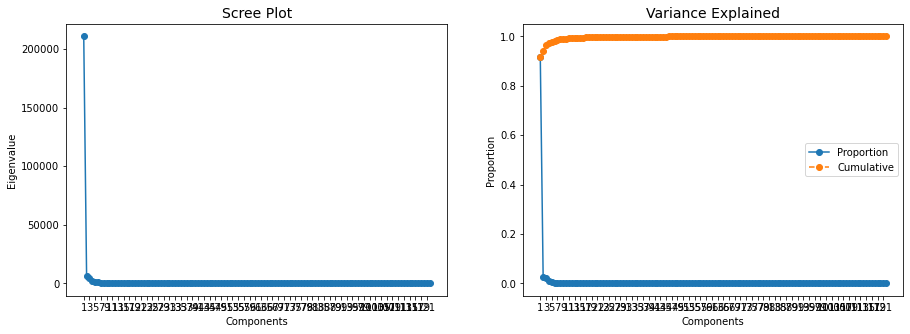

In [10]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [11]:
# According to the Pareto principle, 24 principal components will be used here.
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=24)
pca_feat = pca.fit_transform(X)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=X.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-404.712621,4.100813,-4.963524,-2.857969,-7.981020,10.759719,-7.029118,7.524703,2.119344,-0.393207,-1.319473,-0.812016,1.049849,-2.368702,-1.024815,0.324618,-0.599183,-1.836131,-1.178197,1.366162,-1.163068,-0.202627,0.321582,0.940122
1,-274.801774,-12.090070,-17.015950,-24.422500,9.298958,-1.723417,8.007692,16.802559,-12.292287,-7.798170,6.108101,-0.452813,6.688679,-3.043742,-1.361061,-2.932345,3.738952,-3.984313,1.228955,-0.712286,-2.043718,-1.662264,-1.614119,1.348691
2,-305.231276,-11.965231,7.895135,-12.674752,10.537893,-22.139608,11.825339,-36.590455,4.584718,4.460183,-0.496002,-0.656330,7.534821,9.289593,8.301406,3.893775,4.368006,-21.119799,7.892795,-6.260167,-16.612133,0.345885,1.712211,4.653277
3,-300.993016,-10.730099,13.728425,-10.650364,7.569665,-24.290971,13.222602,-25.440993,2.803237,6.909867,-4.214567,-3.329492,2.762559,-3.005502,1.363343,2.290614,0.447184,-2.111853,3.086218,2.771182,0.869709,0.941663,-9.282977,3.385263
4,-345.579334,8.136911,-4.363802,1.208019,-4.130568,-2.696841,-11.744405,-4.718714,-3.414385,4.310173,0.084067,5.701747,-2.755752,1.546306,7.789934,0.825053,1.630934,-6.950437,1.845470,-3.417046,-0.319911,-1.133869,2.164527,-2.025936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,-251.506544,68.812460,88.436939,124.679221,104.145976,35.948710,16.918825,-9.595536,7.512624,-5.371624,-18.987921,-12.950990,-0.145162,-0.926271,-2.345903,2.092441,14.253726,0.489397,6.481156,0.127332,7.641452,5.830195,6.760298,9.561834
3619,-307.482731,-0.365994,-6.774821,17.980004,-23.115846,6.207780,-6.391831,7.812383,-1.038627,3.394461,-6.719422,-5.754349,-2.429248,6.977975,1.678698,5.823882,-1.347075,2.364138,1.650962,-0.484013,-1.013768,-0.990624,2.747392,-0.139309
3620,840.714749,251.186970,-58.737081,20.146552,-26.191603,-9.613310,19.909427,-56.892393,-4.451103,10.272620,4.786245,-12.019693,14.944818,4.481535,-2.939083,-12.299798,-3.172454,6.661162,3.760938,1.702521,9.432102,-7.595321,-3.049454,-2.775246
3621,1178.727406,-65.764980,-107.832692,145.882266,-72.747651,-87.785413,-61.231867,21.102268,35.995887,-22.079490,-33.474056,-44.092210,-10.122216,-10.242745,2.497998,6.910086,-16.626730,15.931524,11.407368,-0.571750,-26.077916,5.016980,10.006177,-15.692144


In [93]:
# Reassigning df to contain pca variables
df_pca = pd.concat([DB11,pca_df], axis=1)

df_pca.head()

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,ANO,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_3OUMAIS,N_EDIFICIOS_CLASSICOS_OUTROS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_PRINCIPAL_RESID,N_EDIFICIOS_PRINCIP_NAO_RESID,N_EDIFICIOS_1OU2_PISOS,N_EDIFICIOS_3OU4_PISOS,.N_EDIFICIOS_5OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1919,N_EDIFICIOS_CONSTR_1919A1945,N_EDIFICIOS_CONSTR_1946A1960,N_EDIFICIOS_CONSTR_1961A1970,N_EDIFICIOS_CONSTR_1971A1980,N_EDIFICIOS_CONSTR_1981A1990,N_EDIFICIOS_CONSTR_1991A1995,N_EDIFICIOS_CONSTR_1996A2000,N_EDIFICIOS_CONSTR_2001A2005,N_EDIFICIOS_CONSTR_2006A2011,N_EDIFICIOS_ESTRUT_BETAO,N_EDIFICIOS_ESTRUT_COM_PLACA,N_EDIFICIOS_ESTRUT_SEM_PLACA,N_EDIFICIOS_ESTRUT_ADOBE_PEDRA,N_EDIFICIOS_ESTRUT_OUTRA,N_ALOJAMENTOS,N_ALOJAMENTOS_FAMILIARES,N_ALOJAMENTOS_FAM_CLASSICOS,N_ALOJAMENTOS_FAM_N_CLASSICOS,N_ALOJAMENTOS_COLECTIVOS,N_CLASSICOS_RES_HABITUAL,N_ALOJAMENTOS_RES_HABITUAL,N_ALOJAMENTOS_VAGOS,N_RES_HABITUAL_COM_AGUA,N_RES_HABITUAL_COM_RETRETE,N_RES_HABITUAL_COM_ESGOTOS,N_RES_HABITUAL_COM_BANHO,N_RES_HABITUAL_AREA_50,N_RES_HABITUAL_AREA_50_100,N_RES_HABITUAL_AREA_100_200,N_RES_HABITUAL_AREA_200,N_RES_HABITUAL_1_2_DIV,N_RES_HABITUAL_3_4_DIV,N_RES_HABITUAL_ESTAC_1,N_RES_HABITUAL_ESTAC_2,N_RES_HABITUAL_ESTAC_3,N_RES_HABITUAL_PROP_OCUP,N_RES_HABITUAL_ARREND,N_FAMILIAS_CLASSICAS,N_FAMILIAS_INSTITUCIONAIS,N_FAMILIAS_CLASSICAS_1OU2_PESS,N_FAMILIAS_CLASSICAS_3OU4_PESS,N_FAMILIAS_CLASSICAS_NPES65,N_FAMILIAS_CLASSICAS_NPES14,N_FAMILIAS_CLASSIC_SEM_DESEMP,N_FAMILIAS_CLASSIC_1DESEMPREG,N_FAMILIAS_CLASS_2MAIS_DESEMP,N_NUCLEOS_FAMILIARES,N_NUCLEOS_1FILH_NAO_CASADO,N_NUCLEOS_2FILH_NAO_CASADO,N_NUCLEOS_FILH_INF_6ANOS,N_NUCLEOS_FILH_INF_15ANOS,N_NUCLEOS_FILH_MAIS_15ANOS,N_INDIVIDUOS_PRESENT,N_INDIVIDUOS_PRESENT_H,N_INDIVIDUOS_PRESENT_M,N_INDIVIDUOS_RESIDENT,N_INDIVIDUOS_RESIDENT_H,N_INDIVIDUOS_RESIDENT_M,N_INDIVIDUOS_RESIDENT_0A4,N_INDIVIDUOS_RESIDENT_5A9,N_INDIVIDUOS_RESIDENT_10A13,N_INDIVIDUOS_RESIDENT_14A19,N_INDIVIDUOS_RESIDENT_15A19,N_INDIVIDUOS_RESIDENT_20A24,N_INDIVIDUOS_RESIDENT_20A64,N_INDIVIDUOS_RESIDENT_25A64,N_INDIVIDUOS_RESIDENT_65,N_INDIVIDUOS_RESIDENT_H_0A4,N_INDIVIDUOS_RESIDENT_H_5A9,N_INDIVIDUOS_RESIDENT_H_10A13,N_INDIVIDUOS_RESIDENT_H_14A19,N_INDIVIDUOS_RESIDENT_H_15A19,N_INDIVIDUOS_RESIDENT_H_20A24,N_INDIVIDUOS_RESIDENT_H_20A64,N_INDIVIDUOS_RESIDENT_H_25A64,N_INDIVIDUOS_RESIDENT_H_65,N_INDIVIDUOS_RESIDENT_M_0A4,N_INDIVIDUOS_RESIDENT_M_5A9,N_INDIVIDUOS_RESIDENT_M_10A13,N_INDIVIDUOS_RESIDENT_M_14A19,N_INDIVIDUOS_RESIDENT_M_15A19,N_INDIVIDUOS_RESIDENT_M_20A24,N_INDIVIDUOS_RESIDENT_M_20A64,N_INDIVIDUOS_RESIDENT_M_25A64,N_INDIVIDUOS_RESIDENT_M_65,N_INDIV_RESIDENT_N_LER_ESCRV,N_IND_RESIDENT_FENSINO_1BAS,N_IND_RESIDENT_FENSINO_2BAS,N_IND_RESIDENT_FENSINO_3BAS,N_IND_RESIDENT_FENSINO_SEC,N_IND_RESIDENT_FENSINO_POSSEC,N_IND_RESIDENT_FENSINO_SUP,N_IND_RESIDENT_ENSINCOMP_1BAS,N_IND_RESIDENT_ENSINCOMP_2BAS,N_IND_RESIDENT_ENSINCOMP_3BAS,N_IND_RESIDENT_ENSINCOMP_SEC,N_IND_RESIDENT_ENSINCOMP_POSEC,N_IND_RESIDENT_ENSINCOMP_SUP,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,geometry,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,1106,15,002,06,11061500206,022406,Lisboa,2011,,8,Subsec��o,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,6,6,0,0,4,4,1,4,4,4,4,0,3,1,0,0,0,0,0,0,1,3,4,0,4,0,2,0,4,0,0,2,0,0,0,0,0,6,3,3,6,3,3,0,0,0,0,0,1,3,2,3,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,3,0,0,0,0,3,0,0,3,3,3,0,0,3,0,3,"MULTIPOLYGON (((-88023.735 -105513.530, -88050...",-404.712621,4.100813,-4.963524,-2.857969,-7.981020,10.759719,-7.029118,7.524703,2.119344,-0.393207,-1.319473,-0.812016,1.049849,-2.

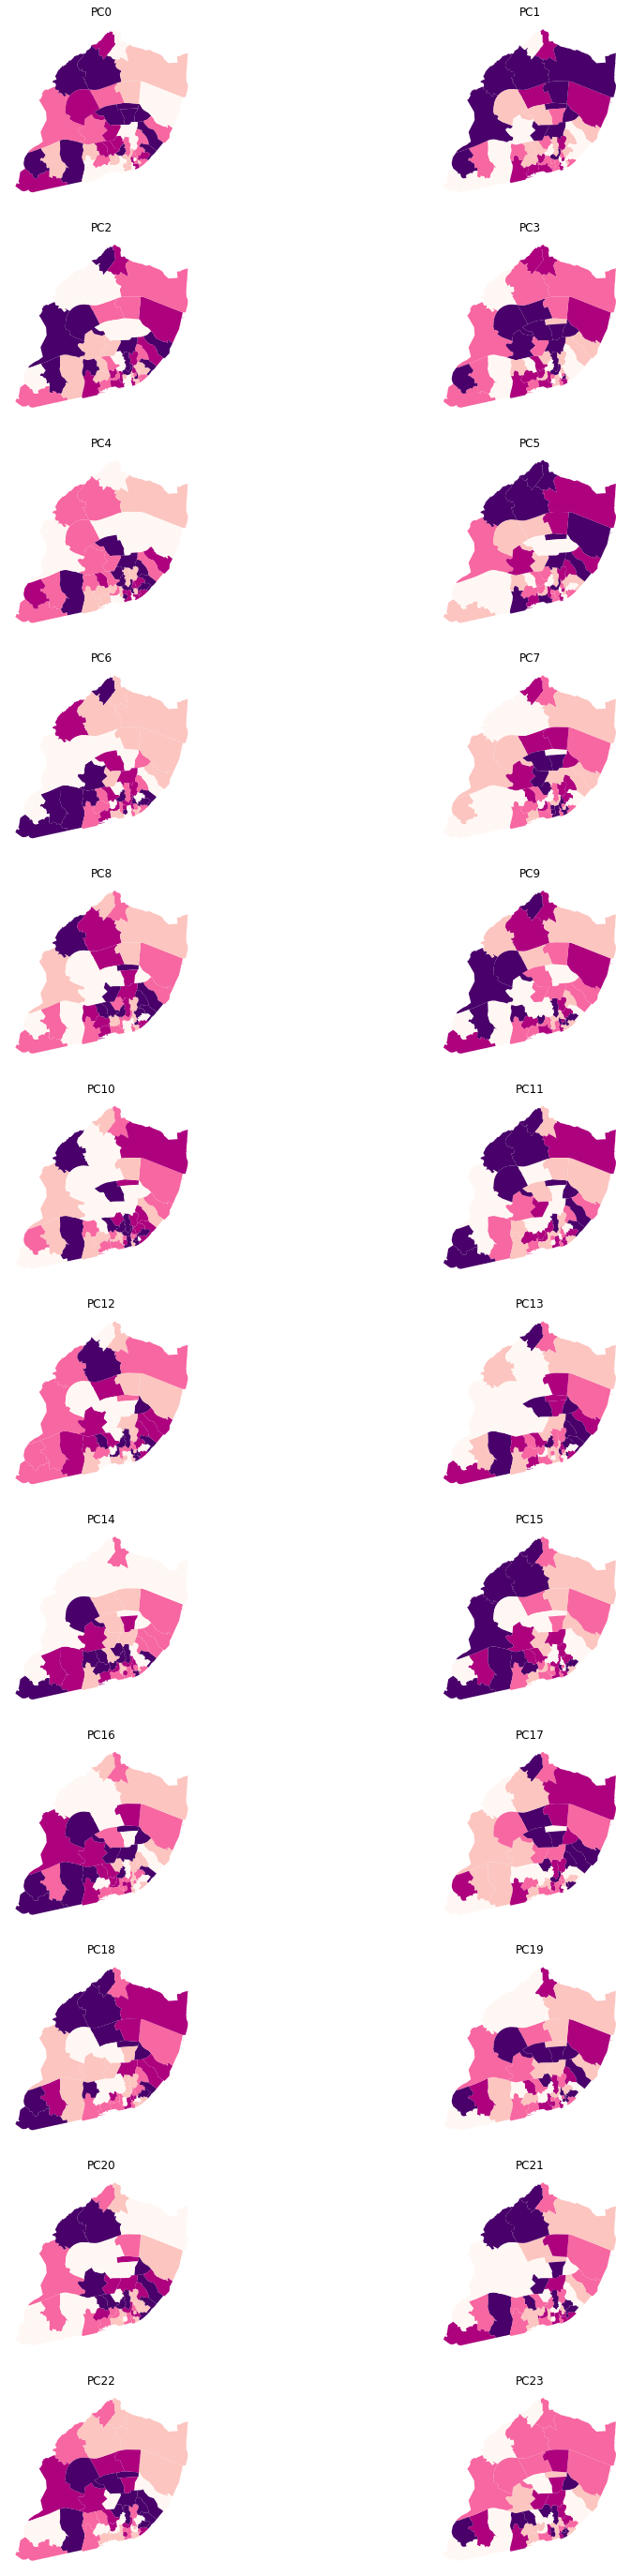

In [13]:
FR11 = df_pca.dissolve(by=['FR11'])

# the spatial distribution of each variable alone. 
f, axs = plt.subplots(nrows=12, ncols=2, figsize=(15,50))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(pca_feat_names):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    FR11.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [14]:
# Initialise KMeans instance
from sklearn.cluster import KMeans

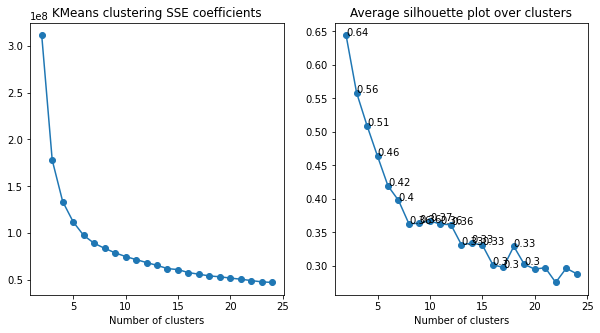

In [15]:
from sklearn.metrics import silhouette_score
# use sse coefficients and Elbow method to select the number of clusters 
sse = []
scores = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    scores.append(silhouette_score(pca_df, kmeans.labels_, metric='euclidean'))
    sse.append(kmeans.inertia_)
    
x = [i for i in range(2,25)]
 
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('KMeans clustering SSE coefficients')
plt.xlabel('Number of clusters')
plt.plot(x, sse, 'o-')
 
plt.subplot(1,2,2)
plt.title('Average silhouette plot over clusters')
plt.xlabel('Number of clusters')
for i in range(2, 20):
    plt.text(i, scores[i-2], (str(round(scores[i-2], 2))))    
plt.plot(x, scores, 'o-')

In [99]:
# Initialise KMeans instance， Selection of 11 number of clusters based on elbow method
kmeans = KMeans(n_clusters=11)

# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k11cls = kmeans.fit(df_pca[pca_feat_names])

# Print first five labels
k11cls.labels_[:5]

array([0, 4, 0, 0, 0])

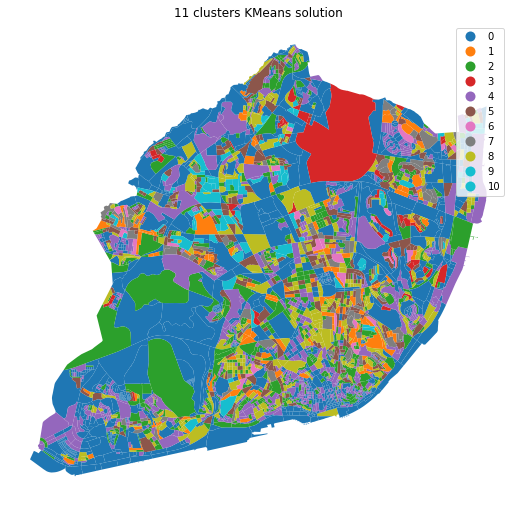

In [100]:
# Assign labels into a column
df_pca["k11cls"] = k11cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
df_pca.plot(
    column="k11cls", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Add title
plt.title('11 clusters KMeans solution')
# Display the map
plt.show()

Here we can see that we get a cluster that is geographically visually dispersed, but its not invalid in nature, especially if we are interested in exploring the overall structure and geographic context of multivariate data. However in this study we need all the observations in a class to be spatially connected. So we will introduce spatial weights .

In [79]:
from sklearn.cluster import AgglomerativeClustering
from pysal.lib import weights
# Here we will include four different types of spatial weights, namely Queen , KNN, Block and Unit (Queen and Block)

#Queen
w_q = weights.contiguity.Queen.from_dataframe(df_pca[pca_feat_names+['geometry']])

#KNN
w_k = weights.KNN.from_dataframe(df_pca[pca_feat_names+['geometry']], k=4)

#Block
w_b = weights.util.block_weights(df_pca['FR11'].values)

#Unit
w_u = weights.set_operations.w_union(w_b, w_q)

In [98]:
w_all = [w_q,w_k,w_b,w_u]
w_methods = ["wardwq", "wardwknn","wardwblock","wardwunit"]

for i, j in enumerate(w_all): 
# Set the seed for reproducibility
    np.random.seed(123456)
# Specify cluster model with spatial constraint
    model = AgglomerativeClustering(
            linkage="ward", connectivity=j.sparse, n_clusters=11
            )
# Fit algorithm to the data
    model.fit(df_pca[pca_feat_names])
    df_pca[w_methods[i]] = model.labels_

#show the first five labels that we have
df_pca.head().iloc[:,-4:]

,wardwq,wardwknn,wardwblock,wardwunit
0,1,1,7,5
1,1,1,0,2
2,1,1,0,5
3,1,1,0,5
4,1,1,7,5


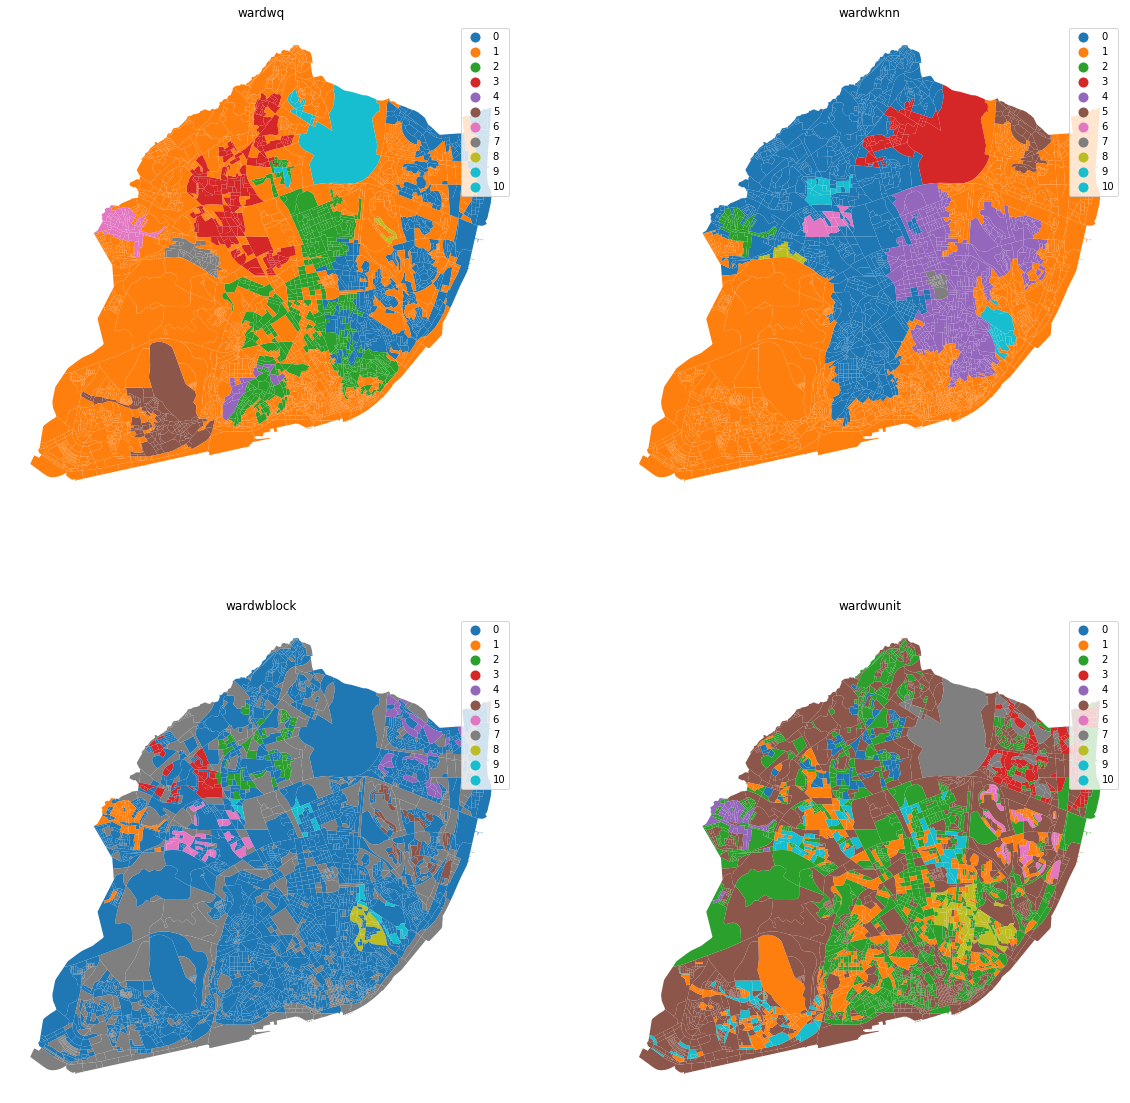

In [101]:
# the spatial distribution of each variable alone. 
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(w_methods):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    df_pca.plot(
        column=col,
        categorical=True,
        legend=True,
        linewidth=0,
        ax=ax)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

One very simple measure of geographical coherence involves the “compactness” of a given shape. The most common of these measures is the isoperimetric quotient [HHV93]. This compares the area of the region to the area of a circle with the same perimeter as the region. To obtain the statistic, we can recognize that the circumference of the circle  is the same as the perimeter of the region i , so Pi = 2πr . Then, the area of the isoperimetric circle is  Ac = π r2 = π(Pi/2π)2. Simplifying, we get: IPQ = Ai/Ac = 4πAi/Pi2
For this measure, more compact shapes have an IPQ closer to 1, whereas very elongated or spindly shapes will have IPQs closer to zero. For the clustering solutions, we would expect the IPQ to be very small indeed, since the perimeter of a cluster/region gets smaller the more boundaries that members share.
Computing this, then, can be done directly from the area and perimeter of a region:

In [102]:
results = []
for cluster_type in w_methods:
    # compute the region polygons using a dissolve
    regions = df_pca[[cluster_type, "geometry"]].dissolve(by=cluster_type)
    # compute the actual isoperimetric quotient for these regions
    ipqs = (
        regions.area * 4 * np.pi / (regions.boundary.length ** 2)
    )
    # cast to a dataframe
    result = ipqs.to_frame(cluster_type)
    results.append(result)
# stack the series together along columns
ipqs = pd.concat(results, axis=1)
ipqs.describe()

,wardwq,wardwknn,wardwblock,wardwunit
count,11.000000,11.000000,11.000000,11.000000
mean,0.150162,0.199090,0.047517,0.025980
std,0.131993,0.132344,0.031358,0.022485
min,0.010254,0.054117,0.003098,0.002405
25%,0.024464,0.103672,0.027055,0.010850
50%,0.142501,0.214411,0.044040,0.021760
75%,0.220667,0.238636,0.068620,0.031721
max,0.402390,0.514576,0.098281,0.071465


From here we can see that the IPQ value of the KNN scheme is optimal regardless of the analysis, and we will further explore the KNN scheme to find a better solution by changing the value of K

In [107]:
for i in range(2, 11):
    w_ki = weights.KNN.from_dataframe(df_pca[pca_feat_names+['geometry']], k=i)
# Set the seed for reproducibility    
    np.random.seed(123456)
# Specify cluster model with spatial constraint
    model = AgglomerativeClustering(linkage="ward", connectivity=w_ki.sparse, n_clusters=11)
# Fit algorithm to the data
    model.fit(df_pca[pca_feat_names])
    df_pca['wardk'+str(i)] = model.labels_

df_pca.head().iloc[:,-14:]

,wardwq,wardwknn,wardwblock,wardwunit,k11cls,wardk2,wardk3,wardk4,wardk5,wardk6,wardk7,wardk8,wardk9,wardk10
0,1,1,7,5,0,1,1,1,1,1,0,0,0,1
1,1,1,0,2,4,1,1,1,1,1,0,0,0,1
2,1,1,0,5,0,1,1,1,1,1,0,0,0,1
3,1,1,0,5,0,1,6,1,1,1,0,0,0,1
4,1,1,7,5,0,0,1,1,1,1,0,0,0,1


In [108]:
results = []
for cluster_type in range(2, 11):
    # compute the region polygons using a dissolve
    regions = df_pca[['wardk'+str(cluster_type), "geometry"]].dissolve(by='wardk'+str(cluster_type))
    # compute the actual isoperimetric quotient for these regions
    ipqs = (
        regions.area * 4 * np.pi / (regions.boundary.length ** 2)
    )
    # cast to a dataframe
    result = ipqs.to_frame('wardk'+str(cluster_type))
    results.append(result)
# stack the series together along columns
ipqs = pd.concat(results, axis=1)
ipqs.describe()

,wardk2,wardk3,wardk4,wardk5,wardk6,wardk7,wardk8,wardk9,wardk10
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.332547,0.278881,0.199090,0.146806,0.083854,0.077526,0.085792,0.046848,0.077007
std,0.272951,0.181554,0.132344,0.136976,0.054784,0.065621,0.075784,0.035059,0.113467
min,0.030964,0.050225,0.054117,0.030204,0.017849,0.010392,0.007296,0.006241,0.005188
25%,0.088721,0.125175,0.103672,0.075907,0.051362,0.030768,0.041045,0.025896,0.020588
50%,0.355152,0.218724,0.214411,0.109583,0.080293,0.057213,0.059706,0.044409,0.036014
75%,0.470657,0.407428,0.238636,0.140420,0.106684,0.123066,0.108650,0.058877,0.071881
max,0.878015,0.587914,0.514576,0.514576,0.205727,0.211539,0.239949,0.133015,0.402390


<AxesSubplot:>

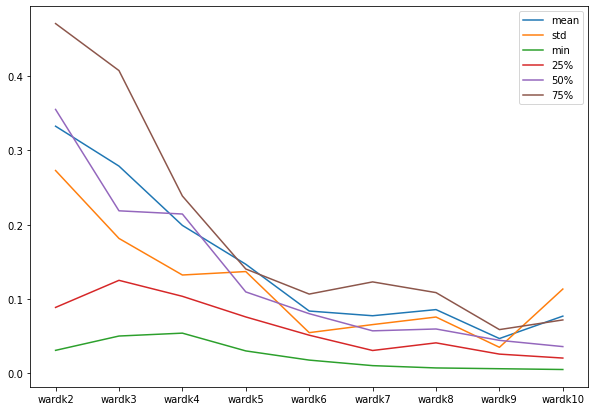

In [136]:
ipqs.describe().T.iloc[:,1:-1].plot(figsize=(10, 7))

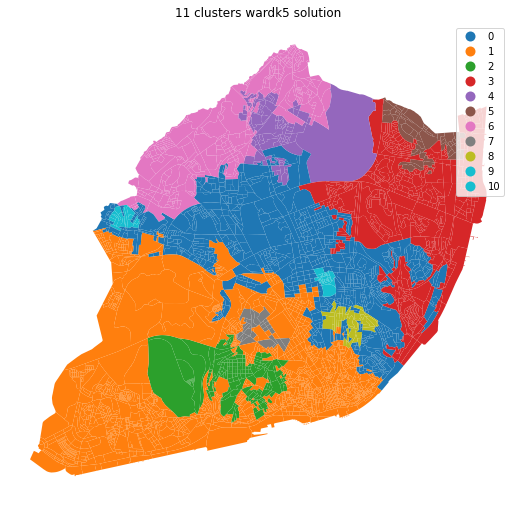

In [125]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
df_pca.plot(
    column="wardk5", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Add title
plt.title('11 clusters wardk5 solution')
# Display the map
plt.show()

In [137]:
DB21.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 48 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   OBJECTID                                                       2822 non-null   int64   
 1   BGRI2021                                                       2822 non-null   object  
 2   DT21                                                           2822 non-null   object  
 3   DTMN21                                                         2822 non-null   object  
 4   DTMNFR21                                                       2822 non-null   object  
 5   DTMNFRSEC21                                                    2822 non-null   object  
 6   SECNUM21                                                       2822 non-null   object  
 7   SSNUM21                                    

In [140]:
DB21.select_dtypes(include=['float','geometry']).head()

,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASS_CONST_1_OU_2_ALOJ,N_EDIFICIOS_CLASS_CONST_3_OU_MAIS_ALOJAMENTOS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_1_OU_2_PISOS,N_EDIFICIOS_3_OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1945,N_EDIFICIOS_CONSTR_1946_1980,N_EDIFICIOS_CONSTR_1981_2000,N_EDIFICIOS_CONSTR_2001_2010,N_EDIFICIOS_CONSTR_2011_2021,N_EDIFICIOS_COM_NECESSIDADES_REPARACAO,N_ALOJAMENTOS_TOTAL,N_ALOJAMENTOS_FAMILIARES,N_ALOJAMENTOS_FAM_CLASS_RHABITUAL,N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA,N_RHABITUAL_ACESSIVEL_CADEIRAS_RODAS,N_RHABITUAL_COM_ESTACIONAMENTO,N_RHABITUAL_PROP_OCUP,N_RHABITUAL_ARRENDADOS,N_AGREGADOS_DOMESTICOS_PRIVADOS,N_ADP_1_OU_2_PESSOAS,N_ADP_3_OU_MAIS_PESSOAS,N_NUCLEOS_FAMILIARES,N_NUCLEOS_FAMILIARES_COM_FILHOS_TENDO_O_MAIS_NOVO_MENOS_DE_25,N_INDIVIDUOS,N_INDIVIDUOS_H,N_INDIVIDUOS_M,N_INDIVIDUOS_0_14,N_INDIVIDUOS_15_24,N_INDIVIDUOS_25_64,N_INDIVIDUOS_65_OU_MAIS,SHAPE_Length,SHAPE_Area,geometry
0,15.0,1.0,14.0,12.0,1.0,14.0,10.0,4.0,0.0,1.0,0.0,4.0,114.0,114.0,84.0,30.0,2.0,4.0,30.0,45.0,84.0,52.0,32.0,39.0,15.0,202.0,106.0,96.0,14.0,31.0,127.0,30.0,409.853268,9657.766943,"MULTIPOLYGON (((-86809.545 -103264.238, -86801..."
1,10.0,0.0,9.0,7.0,0.0,10.0,9.0,0.0,0.0,0.0,1.0,1.0,93.0,92.0,63.0,29.0,21.0,11.0,18.0,38.0,63.0,40.0,23.0,35.0,22.0,197.0,75.0,122.0,26.0,24.0,85.0,62.0,368.048569,8445.226728,"MULTIPOLYGON (((-88183.921 -103236.850, -88218..."
2,8.0,8.0,0.0,8.0,6.0,2.0,0.0,4.0,1.0,3.0,0.0,0.0,8.0,8.0,6.0,2.0,3.0,4.0,4.0,2.0,6.0,1.0,5.0,5.0,4.0,21.0,12.0,9.0,4.0,5.0,9.0,3.0,239.674582,2582.412127,"MULTIPOLYGON (((-94424.359 -107038.246, -94495..."
3,8.0,8.0,0.0,8.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,8.0,7.0,1.0,3.0,7.0,6.0,1.0,7.0,4.0,3.0,6.0,3.0,20.0,8.0,12.0,4.0,2.0,7.0,7.0,250.811945,3077.844919,"MULTIPOLYGON (((-94547.783 -107023.019, -94626..."
4,8.0,8.0,0.0,8.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,8.0,7.0,1.0,2.0,6.0,6.0,1.0,7.0,3.0,4.0,7.0,5.0,22.0,9.0,13.0,7.0,3.0,8.0,4.0,238.956181,2555.620562,"MULTIPOLYGON (((-94440.784 -107017.804, -94514..."
